In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf 

Load Dataset!

In [2]:
housing = datasets.fetch_california_housing()

In [3]:
new_column_names = [
    "median_income",
    "housing_age",
    "avg_rooms",
    "avg_bedrooms",
    "population",
    "avg_occupancy",
    "latitude",
    "longitude",
    "median_house_value"
]
housing = pd.DataFrame(
    np.c_[housing.data, housing.target],
    columns = housing.feature_names + ["MedHouseVal"]
)
housing.columns = new_column_names
housing.head(5)

,median_income,housing_age,avg_rooms,avg_bedrooms,population,avg_occupancy,latitude,longitude,median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
housing.describe()

,median_income,housing_age,avg_rooms,avg_bedrooms,population,avg_occupancy,latitude,longitude,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   median_income       20640 non-null  float64
 1   housing_age         20640 non-null  float64
 2   avg_rooms           20640 non-null  float64
 3   avg_bedrooms        20640 non-null  float64
 4   population          20640 non-null  float64
 5   avg_occupancy       20640 non-null  float64
 6   latitude            20640 non-null  float64
 7   longitude           20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
housing.corr()

,median_income,housing_age,avg_rooms,avg_bedrooms,population,avg_occupancy,latitude,longitude,median_house_value
median_income,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
housing_age,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
avg_rooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
avg_bedrooms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
avg_occupancy,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
median_house_value,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


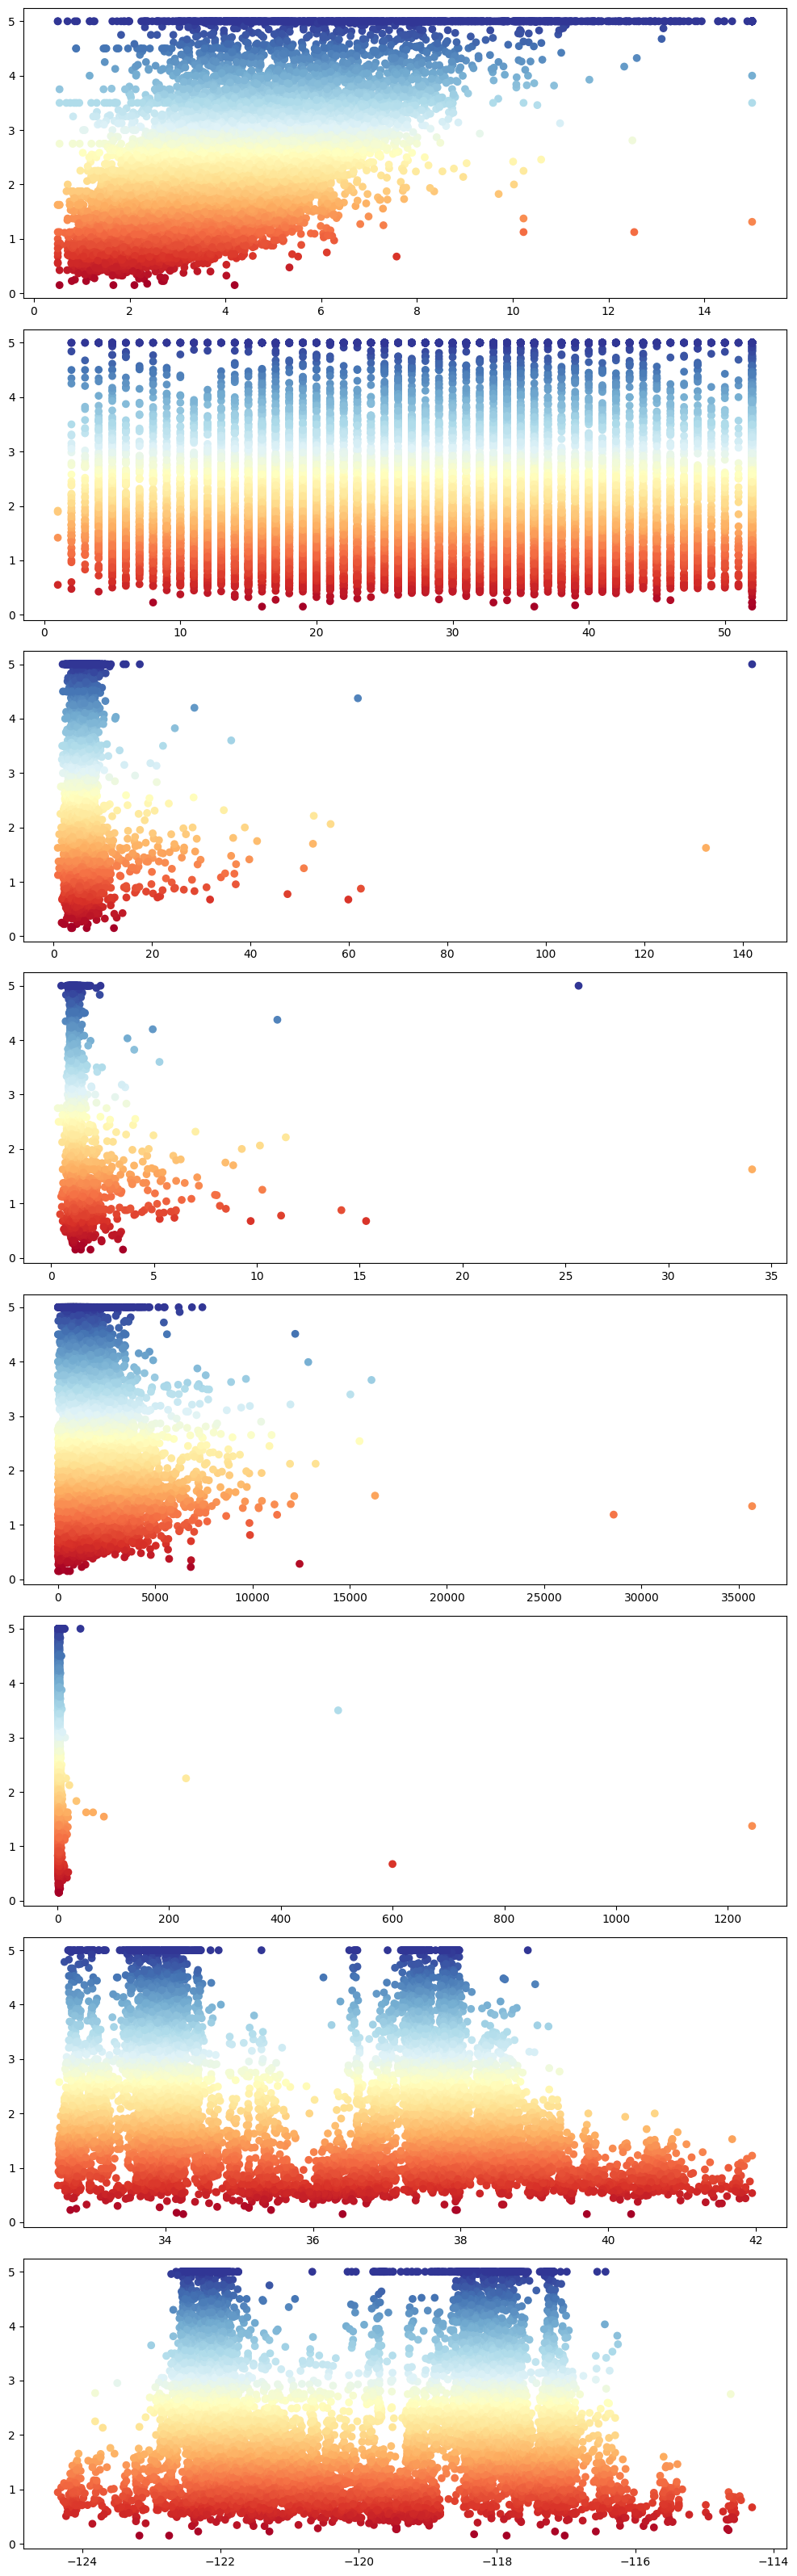

In [7]:
features  = new_column_names[:-1]
fig, ax = plt.subplots(8, figsize=(10, 8*4))
ax = ax.flatten()

for i, label in enumerate(features):
    # sns.violinplot(x=housing[label], y=housing['median_house_value'], ax=ax[i])
    # ax[i].set_title(label)
    ax[i].scatter(x=housing[label], y=housing['median_house_value'], c=housing['median_house_value'], cmap=plt.cm.RdYlBu)



for j in range(i + 1, len(ax)):
    ax[j].axis("off")

plt.tight_layout()
plt.show()

In [8]:
X = housing.drop("median_house_value", axis=1)
y = housing["median_house_value"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
len(X_train), len(X_test), len(y_train), len(y_test)

(16512, 4128, 16512, 4128)

TensorFlow Model for regression problem

In [23]:
tf.random.set_seed(42)

housing_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

housing_model.compile(loss = tf.keras.losses.mae, optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["mae"])

history = housing_model.fit(X_train, y_train, epochs=50)

Epoch 1/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 17.1946 - mae: 17.1946
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.6215 - mae: 8.6215
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.6025 - mae: 8.6025
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.8502 - mae: 8.8502
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.2670 - mae: 7.2670
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.3109 - mae: 5.3109
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.8938 - mae: 5.8938
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.8637 - mae: 7.8637
Epoch 9/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.3834 - mae: 6.3834
Epoch 10/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.9228 - mae: 5.9228
Epoch 11/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.7773 - mae: 5.7773
Epoch 12/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.8773 - mae: 4.8773
Epoch 13/50
516/516 ━━━

In [24]:
housing_model.evaluate(X_test, y_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6384 - mae: 1.6384


[1.6401289701461792, 1.6401289701461792]

Text(0.5, 0, 'epochs')

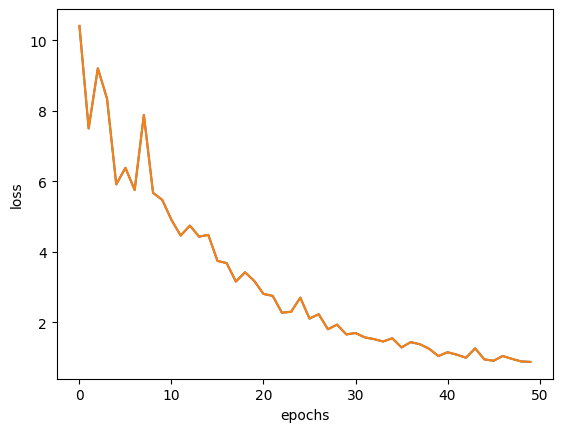

In [25]:
pd.DataFrame(history.history).plot(legend=False)
plt.ylabel("loss")
plt.xlabel("epochs")